# Logistic Regression 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1: Read the dataset 

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: Perform basic data quality checks 

In [3]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

## Step 3: Seperate X and Y (Species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Step 4: Preprocess data for X

In [10]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),('scalar',StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Step 5: Train Test

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [15]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [16]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [17]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [18]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [19]:
xtrain.shape

(100, 4)

In [20]:
xtest.shape

(50, 4)

## Step5: Model Building

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [22]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
model.intercept_

array([-0.1627398 ,  1.82302367, -1.66028386])

In [24]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [25]:
model.coef_

array([[-0.93728904,  1.24988548, -1.63694748, -1.61318588],
       [ 0.38686136, -0.37382492, -0.41064574, -0.59860246],
       [ 0.55042768, -0.87606056,  2.04759322,  2.21178835]])

## step 6: Model Evaluation

In [26]:
# accuracy in train 
model.score(xtrain, ytrain)

0.98

In [27]:
# accuracy in test
model.score(xtest, ytest)

0.94

In [28]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [29]:
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [30]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [31]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [32]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [33]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
ypred_test_prob = model.predict_proba(xtest)

In [35]:
ypred_test_prob[0:5]

array([[2.05266705e-02, 9.13163097e-01, 6.63102325e-02],
       [9.87197937e-01, 1.28015060e-02, 5.57125997e-07],
       [9.72254534e-01, 2.77449526e-02, 5.12940556e-07],
       [9.85940619e-01, 1.40589883e-02, 3.92769779e-07],
       [8.81329982e-02, 8.60832662e-01, 5.10343401e-02]])

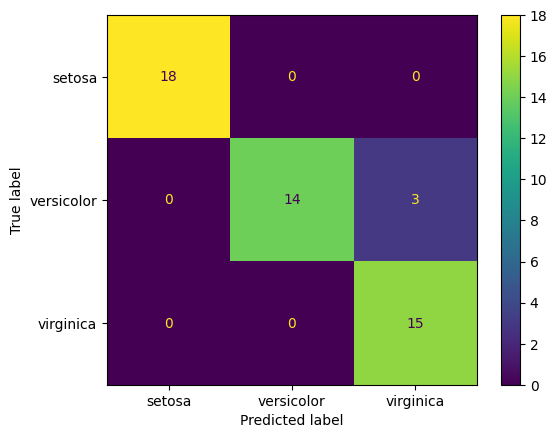

In [36]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring = "f1_macro")
scores

array([0.90277778, 1.        , 1.        , 0.94871795, 1.        ])

In [39]:
scores.mean()

0.9702991452991453

## Above is good model i can use it for out of sample prediction

## Step 7: Out of sample prediction

In [40]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [41]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scalar', StandardScaler())])

In [42]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [43]:
preds = model.predict(xnew_pre)
probs = model.predict_proba(xnew_pre)

In [44]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [45]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
probs

array([[1.93292727e-02, 8.82537594e-01, 9.81331333e-02],
       [1.80315390e-04, 6.76221053e-02, 9.32197579e-01],
       [9.73213051e-02, 8.91868487e-01, 1.08102083e-02],
       [7.45709340e-01, 2.54116291e-01, 1.74368528e-04],
       [5.90541932e-03, 3.31763397e-01, 6.62331183e-01],
       [9.63296887e-01, 3.67026084e-02, 5.04715947e-07],
       [1.60683756e-01, 8.11677570e-01, 2.76386741e-02],
       [7.55605408e-04, 1.55677416e-01, 8.43566978e-01],
       [9.85175448e-01, 1.48243463e-02, 2.05612795e-07],
       [8.87027458e-01, 1.12886703e-01, 8.58384446e-05],
       [2.30367528e-02, 8.97506058e-01, 7.94571891e-02],
       [2.62907569e-02, 9.48058330e-01, 2.56509126e-02],
       [3.40647499e-06, 1.34534099e-02, 9.86543184e-01],
       [5.75880409e-03, 6.45418038e-01, 3.48823158e-01],
       [4.93349887e-04, 4.04352561e-01, 5.95154090e-01]])

In [47]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.88253759, 0.93219758, 0.89186849, 0.74570934, 0.66233118,
       0.96329689, 0.81167757, 0.84356698, 0.98517545, 0.88702746,
       0.89750606, 0.94805833, 0.98654318, 0.64541804, 0.59515409])

## Save preds and max prob in dataframe and csv

In [48]:
xnew['species_pred'] = preds
xnew['probs'] = max_probs

In [49]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,probs
0,5.5,2.5,4.0,1.3,versicolor,0.882538
1,6.9,3.1,5.1,2.3,virginica,0.932198
2,5.1,2.5,3.0,1.1,versicolor,0.891868
3,4.4,2.9,NaN,0.2,setosa,0.745709
4,5.9,3.0,5.1,1.8,virginica,0.662331
5,5.5,3.5,1.3,0.2,setosa,0.963297
6,5.6,NaN,3.6,1.3,versicolor,0.811678
7,6.5,3.0,5.2,2.0,virginica,0.843567
8,5.3,3.7,1.5,0.2,setosa,0.985175
9,5.1,3.4,1.5,NaN,setosa,0.887027


: 